# Proyecto 7

**Descripción:** Combina técnicas de word vector quantization con métodos de regularización en RNNs para abordar el problema del gradiente desvanecido, mejorando el entrenamiento de redes profundas.

**Componentes clave:**
- Word Vector Quantization
- Regularización en RNNs
- Problema del gradiente desaparecido

**Componente de código:**  Implementación en PyTorch de una RNN que aplica cuantización devectores y técnicas de regularización (como dropout o L2) para una tarea de predicción de secuencia

# RNN

Las redes neuronales recurrentes (RNNs) son una clase de redes neuronales que son especialmente adecuadas para procesar datos secuenciales o temporales, como texto, audio o series temporales. A diferencia de las redes neuronales tradicionales que asumen independencia entre las entradas, las RNNs tienen "memoria" sobre entradas anteriores. Esto les permite retener información a través del tiempo y utilizar esta información para influir en la salida actual, lo cual es crucial para tareas donde el contexto y el orden de los datos son importantes, como el procesamiento del lenguaje natural o el análisis de series temporales.

En este caso se ha creado una RNN con la libreria Pytorch, siguiendo algunas de las sugerencias del cuaderno de actividades del curso y del repositorio https://github.com/rubensolano2/GUIDES-AND-PRACTICES/blob/main/GUIDE_OF_PYTORCH_FROM_SCRATCH.ipynb para el uso de pytorch con cuda y metricas de RNN.

# ¿Qué es Retropropagación?

El algoritmo de retropropagación (backpropagation) es uno de los pilares fundamentales en el campo del aprendizaje profundo y las redes neuronales artificiales. Introducido en la década de 1980, ha permitido entrenar redes neuronales de múltiples capas, superando las limitaciones de los métodos anteriores y abriendo camino a los avances actuales en inteligencia artificial.

**El problema del entrenamiento de redes neuronales**

El objetivo del entrenamiento es ajustar los pesos y sesgos de la red para que las predicciones se acerquen lo más posible a los valores objetivos. Esto se logra minimizando una función de pérdida, que cuantifica el error entre las predicciones y los objetivos.

**El algoritmo de retropropagación**

La retropropagación es un algoritmo que calcula eficientemente los gradientes de la función de pérdida con respecto a todos los pesos y sesgos en la red neuronal. Se basa en la regla de la cadena del cálculo diferencial y permite actualizar los parámetros utilizando métodos de optimización como el descenso de gradiente.

**Pasos del algoritmo:**

1. **Pase hacia adelante (forward pass)**
- Las entradas se propagan a través de la red para obtener las predicciones $\hat{y}$.
- Se calcula la función de pérdida $L(y,\hat{y})$.

2. **Pase hacia atrás (backward pass)**
- Se calcula el gradiente de la pérdida con respecto a las salidas de la red.
- Se aplica la regla de la cadena para propagar los gradientes hacia atrás a través de cada capa.
- Se calculan los gradientes con respecto a los pesos y sesgos.

3. **Actualización de parámetros**
- Los pesos y sesgos se actualizan utilizando un algoritmo de optimización (p. ej., descenso de gradiente).

**El problema del entrenamiento de redes neuronales**

El objetivo del entrenamiento es ajustar los pesos y sesgos de la red para que las predicciones $\hat{y}$ se acerquen lo más posible a los valores objetivos $y$. Esto se logra minimizando una función de pérdida $L(y, \hat{y})$, que cuantifica el error entre las predicciones y los objetivos.

*Función de pérdida común: error cuadrático medio (MSE)*

$L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

**Desafío principal:**
*Optimización de parámetros*: Encontrar los valores óptimos de los pesos y sesgos que minimicen la función de pérdida.
**Computación de gradientes**: Calcular cómo la pérdida cambia con respecto a cada parámetro para ajustar los pesos en la dirección que reduce el error.

# Retropropagacion para RNN

La retropropagación a través del tiempo (BPTT) es una variante del algoritmo de retropropagación diseñado específicamente para entrenar redes neuronales recurrentes (RNNs). Este método es ampliamente utilizado para tareas relacionadas con datos secuenciales como procesamiento de lenguaje natural, series temporales y reconocimiento de voz.

a. **Pasos**
1. **Despliegue de la red:** La RNN se "despliega" en el tiempo, transformándola en una red neuronal equivalente de tipo feedforward (sin bucles), donde cada instante de tiempo (fold) se representa como una capa. Las conexiones recurrentes comparten los mismos pesos en todas las capas desplegadas.

2. **Propagación hacia adelante:** Se calculan las activaciones de las neuronas para cada instante de tiempo utilizando las entradas actuales, los estados pasados y las conexiones recurrentes.

La fórmula que sigue es:
$r"x_i(t) = \sum_{j \in H} w_{ij}y_j(t) + \sum_{j \in M} w_{ij}x_j + \sum_{\tau} \sum_{j \in I} w_{ij}y_j(t-\tau)"))$

3. **Calculo del error:** Se compara la salida predicha de la red con la salida deseada usando una función de costo. (normalmente MSE).

4. **Propagación hacia atrás:** A partir de la última capa, se calcula el gradiente del error con respecto a los pesos y sesgos de cada conexión usando la regla de la cadena.

- **Capa de salida:** el error es la diferencia entre el valor esperado y el obtenido.

$\delta_j(t) = (d_j - y_j)(1 - y_j)y_j$

- **Capa Oculta:**el error se calcula propagando las señales desde las capas sucesoras.

$\delta_j(t) = y_j (1 - y_j) \sum_{i \in \text{Suc}(j)} w_{ij} \delta_i(t)$

5. **Actualización de pesos:** Los pesos se ajustan con base en el error calculado y una tasa de aprendizaje (Descenso del gradiente)

6. **Replegado de la red:** Después de actualizar los pesos, la red desplegada se pliega nuevamente en su forma recurrente original. Los pesos se agregan a través de los diferentes instantes de tiempo para representar el aprendizaje temporal.

b. **Limitaciones**

El algoritmo de retropropagación tiene algunas limitaciones que se basan en el comportamiento de la función de activación, como la saturación y el desvanecimiento del gradiente, lo cual causa una ralentización en el aprendizaje de los pesos asociados a las neuronas y dificulta el entrenamiento eficiente de redes profundas.

Por ejemplo, la función sigmoide tiende a saturarse cuando las activaciones están cerca de 0 o 1, lo cual causa que los gradientes sean prácticamente nulos y ralentice el aprendizaje de los pesos. Por eso se recomienda utilizar funciones de activación como ReLU, que no presentan saturación en el rango positivo y permiten un flujo más consistente de gradientes hacia las capas iniciales.

In [85]:
# Importación de librerías necesarias
import torch
import torch.nn as nn
import torch.optim as optim
import math
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Configuración del dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [86]:
# Paso 1: Preparación de Datos
# Leer y tokenizar el texto desde el archivo de entrada
with open('Ejemplo.txt', 'r') as file:
    text = file.read()

# Crear vocabulario de caracteres únicos
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

# Convertir texto a índices de caracteres
encoded_text = [char_to_idx[ch] for ch in text]

# Definir dataset para secuencias de caracteres
class TextDataset(Dataset):
    def __init__(self, data, seq_len):
        self.data = data
        self.seq_len = seq_len

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        return (torch.tensor(self.data[idx:idx + self.seq_len]),
                torch.tensor(self.data[idx + 1:idx + self.seq_len + 1]))



In [87]:
# Paso 4: Evaluación del Modelo
def evaluate_model(modelo, dataloader, criterion):
    modelo.eval()
    total_loss = 0
    total_correct = 0
    total_chars = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            batch_size = inputs.size(0)
            hidden = modelo.init_hidden(batch_size)

            outputs, hidden = modelo(inputs, hidden)
            loss = criterion(outputs, targets.view(-1))
            total_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, dim=1)
            total_correct += (predicted == targets.view(-1)).sum().item()
            total_chars += targets.numel()

    avg_loss = total_loss / len(dataloader.dataset)
    perplexity = math.exp(avg_loss)
    accuracy = total_correct / total_chars

    return avg_loss, perplexity, accuracy

# Paso 5: Generación de Texto
def generate_text(modelo, start_str, length=200):
    modelo.eval()
    caracteres = [char_to_idx[c] for c in start_str]
    input_seq = torch.tensor(caracteres).unsqueeze(0).to(device)
    hidden = modelo.init_hidden(1)

    texto_generado = start_str

    with torch.no_grad():
        for _ in range(length):
            output, hidden = modelo(input_seq, hidden)
            prob = torch.nn.functional.softmax(output[-1], dim=0)
            char_idx = torch.multinomial(prob, 1).item()
            texto_generado += idx_to_char[char_idx]
            input_seq = torch.tensor([[char_idx]]).to(device)

    print("\nTexto Generado:")
    print(texto_generado)
    return texto_generado

# Gradiente Desaparecido (vanishing gradient)

El desvanecimiento del gradiente es una dificultad frecuente al entrenar redes neuronales artificiales mediante métodos como el descenso estocástico de gradientes y la retropropagación. En estos métodos, cada peso de la red neuronal se actualiza proporcionalmente a la derivada parcial de la función de error con respecto al peso actual. Sin embargo, en ciertas circunstancias, el gradiente puede reducirse a valores muy pequeños, dificultando la actualización de los pesos e impidiendo el aprendizaje efectivo de la red, especialmente en redes profundas.

#### **Causas del desvanecimiento del gradiente**
1. **Funciones de activación**: Funciones como la sigmoide y la tangente hiperbólica comprimen los valores en rangos limitados, resultando en derivadas pequeñas cerca de los extremos, lo que produce gradientes insignificantes.

2. **Profundidad de las redes:** Las redes profundas exacerban el problema debido a la multiplicación sucesiva de gradientes a lo largo de las capas, lo que provoca una disminución exponencial.

3. **Secuencias largas en RNNs:** En tareas de secuencia a secuencia, como el procesamiento del lenguaje natural, cada intervalo de tiempo actúa como una capa adicional, aumentando la probabilidad de desvanecimiento del gradiente.

#### **Implicaciones y desafíos**
1. **Convergencia lenta:** Los pesos se actualizan con pequeñas magnitudes, ralentizando el aprendizaje.

2. **Dificultad para capturar dependencias a largo plazo:** Especialmente problemático en redes neuronales recurrentes (RNN).

3. **Explosión de gradientes:** Como contrapartida, en algunos casos, los gradientes pueden aumentar desproporcionadamente, haciendo inestable el entrenamiento.

#### **Estrategias de mitigación**
- **Inicialización de pesos:** Métodos como la inicialización de He garantizan que los gradientes no desaparezcan ni exploten.
- **Funciones de activación mejoradas:** El uso de ReLU y variantes como Leaky ReLU o Parametric ReLU evita gradientes cero para entradas positivas.

- **Conexiones residuales:** Arquitecturas como ResNet utilizan conexiones de salto para facilitar el flujo de gradientes.

- **Recorte de gradiente:** Limita la magnitud del gradiente durante la retropropagación para prevenir explosiones.

- **LSTM y GRU:** Estas arquitecturas especializadas en redes recurrentes incluyen mecanismos que regulan el flujo de información, ayudando a superar el desvanecimiento del gradiente en secuencias largas.

In [88]:
# Paso 2: Definición del Modelo RNN
class CompleteRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_capas):
        super(CompleteRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_capas
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=num_capas, nonlinearity='tanh',batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid() # funcion sigmoide

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.sigmoid(out)
        out = self.fc(out.reshape(-1, self.hidden_dim))
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(device)

# Paso 3: Función de Entrenamiento
def train(modelo, dataloader, criterion, optimizer, epocas):
    modelo.train()
    grad_norms = []

    for epoch in range(epocas):
        total_loss = 0

        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            batch_size = inputs.size(0)
            hidden = modelo.init_hidden(batch_size)

            optimizer.zero_grad()

            outputs, hidden = modelo(inputs, hidden)
            loss = criterion(outputs, targets.view(-1))
            loss.backward()

            grad_norm = 0
            for p in modelo.rnn.parameters():
                if p.grad is not None:
                    grad_norm += p.grad.norm().item()
            grad_norms.append(grad_norm)

            optimizer.step()
            total_loss += loss.item()

        print(f'Época [{epoch + 1}/{epocas}], Pérdida: {total_loss / len(dataloader):.4f}')

    plt.plot(grad_norms)
    plt.xlabel('Batch')
    plt.ylabel('Norma del Gradiente')
    plt.title('Norma de los Gradientes Durante el Entrenamiento')
    plt.show()

In [ ]:
# Parámetros de entrada
sequence_length = 100
num_layers = 10
vocab_size = len(chars)
batch_size = 256

# Crear el dataloader
dataset = TextDataset(encoded_text, sequence_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Paso 6: Configuración y Entrenamiento
embedding_dim = 128
hidden_dim = 256
output_dim = vocab_size
learning_rate = 0.00001
epochs = 10

model = CompleteRNN(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train(model, dataloader, criterion, optimizer, epochs)

# Evaluación del Modelo
avg_loss, perplexity, accuracy = evaluate_model(model, dataloader, criterion)
print(f'Pérdida Promedio en Validación: {avg_loss:.4f}')
print(f'Perplejidad: {perplexity:.4f}')
print(f'Exactitud (Accuracy): {accuracy * 100:.2f}%')

# Generación de texto
start_str = "King"
generated_text = generate_text(model, start_str, length=200)

# Explosion de Gradiente

El gradiente explosivo ocurre cuando los gradientes se vuelven extremadamente grandes durante la retropropagación, causando cambios drásticos en los valores de los pesos. Este fenómeno es especialmente común en redes profundas o redes neuronales recurrentes (RNN) que procesan secuencias largas.

#### **Causas del gradiente explosivo**
1. **Inicialización incorrecta de pesos:** Pesos iniciales con valores altos incrementan el riesgo de explosión en los gradientes.

2. **Tasa de aprendizaje alta:** Valores altos en la tasa de aprendizaje producen actualizaciones excesivamente grandes en los pesos.

3. **Funciones de activación inapropiadas:** Funciones como la sigmoide pueden exacerbar el problema debido a su naturaleza no lineal y sus derivadas pequeñas.

4. **Secuencias largas:** En tareas como el procesamiento de lenguaje natural, la multiplicación sucesiva de gradientes a lo largo de las capas temporales puede amplificar sus valores.

#### **Consecuencias del gradiente explosivo**
1. **Inestabilidad en el entrenamiento:** Las oscilaciones o divergencias en la pérdida (loss) hacen que el modelo sea inestable.

2. **Parámetros y predicciones inconsistentes:** Los cambios abruptos en los pesos provocan resultados poco confiables.

3. **Desbordamiento numérico:** Los valores extremadamente grandes pueden superar los límites numéricos del sistema, causando errores de cálculo.

4. **Ineficiencia en la optimización:** Dificulta el aprendizaje eficiente o lleva a la divergencia total del modelo.

#### **Soluciones al gradiente explosivo**
- **Uso de funciones de activación adecuadas:** La función ReLU y sus variantes (Leaky ReLU, Parametric ReLU) ayudan a mantener los gradientes en rangos manejables.

- **Optimizadores avanzados:** RMSprop ajusta dinámicamente la tasa de aprendizaje, evitando actualizaciones abruptas en los pesos.

- **Arquitecturas especializadas:** Las redes LSTM incluyen mecanismos internos, como las puertas de olvido, que controlan el flujo de información y mitigan tanto gradientes explosivos como desvanecientes.

- **Retropropagación truncada:** Limita la propagación de gradientes hacia capas más antiguas, estableciendo un límite en las actualizaciones.

- **Recorte de gradientes:** Implementar un umbral para limitar la magnitud máxima de los gradientes durante la retropropagación.

In [39]:
# Paso 2: Definición del Modelo RNN
class CompleteRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_capas):
        super(CompleteRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_capas
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=num_capas, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.tanh = nn.Tanh()

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.tanh(out)
        out = self.fc(out.reshape(-1, self.hidden_dim))
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(device)

# Paso 3: Función de Entrenamiento
def train(modelo, dataloader, criterion, optimizer, epocas):
    modelo.train()
    grad_norms = []

    for epoch in range(epocas):
        total_loss = 0

        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            batch_size = inputs.size(0)
            hidden = modelo.init_hidden(batch_size)

            optimizer.zero_grad()

            outputs, hidden = modelo(inputs, hidden)
            loss = criterion(outputs, targets.view(-1))
            loss.backward()

            grad_norm = 0
            for p in modelo.rnn.parameters():
                if p.grad is not None:
                    grad_norm += p.grad.norm().item()
            grad_norms.append(grad_norm)

            optimizer.step()
            total_loss += loss.item()

        print(f'Época [{epoch + 1}/{epocas}], Pérdida: {total_loss / len(dataloader):.4f}')

    plt.plot(grad_norms)
    plt.xlabel('Batch')
    plt.ylabel('Norma del Gradiente')
    plt.title('Norma de los Gradientes Durante el Entrenamiento')
    plt.show()

Época [1/25], Pérdida: 3.0999
Época [2/25], Pérdida: 2.3714
Época [3/25], Pérdida: 2.1281
Época [4/25], Pérdida: 1.9942
Época [5/25], Pérdida: 1.8966
Época [6/25], Pérdida: 1.8202
Época [7/25], Pérdida: 1.7578
Época [8/25], Pérdida: 1.7045
Época [9/25], Pérdida: 1.6578
Época [10/25], Pérdida: 1.6158
Época [11/25], Pérdida: 1.5774
Época [12/25], Pérdida: 1.5421
Época [13/25], Pérdida: 1.5091
Época [14/25], Pérdida: 1.4780
Época [15/25], Pérdida: 1.4484
Época [16/25], Pérdida: 1.4202
Época [17/25], Pérdida: 1.3930
Época [18/25], Pérdida: 1.3668
Época [19/25], Pérdida: 1.3415
Época [20/25], Pérdida: 1.3170
Época [21/25], Pérdida: 1.2932
Época [22/25], Pérdida: 1.2699
Época [23/25], Pérdida: 1.2470
Época [24/25], Pérdida: 1.2243
Época [25/25], Pérdida: 1.2021


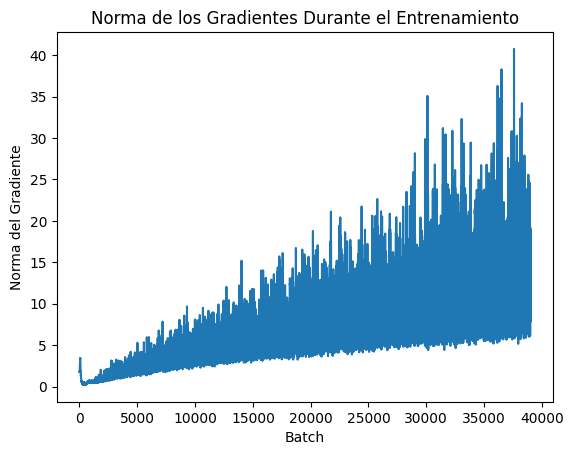

Pérdida Promedio en Validación: 1.1901
Perplejidad: 3.2875
Exactitud (Accuracy): 64.67%

Texto Generado:
King feed it ever to seem fellow and borrenoush.

BTOLILUS:
Firraition; but my while his languought
But now to report tell a prains your honourin,
And volk one ampled mer;
He can ear
would know not to you


In [40]:
# Parámetros de entrada
sequence_length = 200
num_layers = 6
vocab_size = len(chars)
batch_size = 64

# Crear el dataloader
dataset = TextDataset(encoded_text, sequence_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Paso 6: Configuración y Entrenamiento
embedding_dim = 128
hidden_dim = 256
output_dim = vocab_size
learning_rate = 0.00001
epochs = 25

model = CompleteRNN(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train(model, dataloader, criterion, optimizer, epochs)

# Evaluación del Modelo
avg_loss, perplexity, accuracy = evaluate_model(model, dataloader, criterion)
print(f'Pérdida Promedio en Validación: {avg_loss:.4f}')
print(f'Perplejidad: {perplexity:.4f}')
print(f'Exactitud (Accuracy): {accuracy * 100:.2f}%')

# Generación de texto
start_str = "King"
generated_text = generate_text(model, start_str, length=200)

# Añadiendo una capa dropout y Regularizacion L2

1. **Dropout:** es una técnica de regularización para redes neuronales que introduce aleatoriedad durante el entrenamiento, "apagando" (o eliminando temporalmente) ciertas unidades o neuronas en cada iteración. Esto ayuda a prevenir el sobreajuste y mejora la capacidad de generalización del modelo.

    a. **Funcionamiento**
    Para ello se siguen los siguientes pasos
    
    1. **Adaptación del Dropout:** En redes estándar, el Dropout apaga aleatoriamente ciertas neuronas durante el entrenamiento. Sin embargo, en las RNNs, si esto se aplica directamente a las conexiones recurrentes, puede desestabilizar el aprendizaje temporal. Por lo que se propone aplicar el Dropout solo en las conexiones entre capas (no en las conexiones recurrentes dentro de la misma capa).
    
    2. **Entrenamiento:** Durante el entrenamiento, un porcentaje de las unidades en las conexiones entre capas es desactivado aleatoriamente.  
    Por ejemplo, si el Dropout es del 50%, la mitad de las neuronas de la capa se desactivan, esto evita que ciertas conexiones o patrones dominen el aprendizaje, promoviendo una representación más robusta de los datos.
    
        Las neuronas activas permanecen activas se ajustan multiplicando su salida por un factor inverso al porcentaje de Dropout para mantener el mismo promedio de activación. Esto evita que el modelo dependa demasiado de neuronas específicas.
    
        Las neuronas apagadas no contribuye a las activaciones en las siguientes capas ni al cálculo del gradiente durante el backpropagation
    
    3. **Predicción:** En la fase de predicción, el Dropout no se aplica. En su lugar, las activaciones se escalan proporcionalmente para compensar las unidades desactivadas durante el entrenamiento.

2. **La regresión de Ridge (o regularización L2):** es una técnica de regularización que penaliza de manera similar los coeficientes de alto valor introduciendo un término de penalización en la función de pérdida SSE. El término de penalización en la regresión de Ridge es la suma al cuadrado de los coeficientes, esto hace que la regresión de Ridge no promulgue la selección de características, es decir solo reduce los pesos de las características hacia cero, pero nunca a cero. Es por ello que multiplicaremos ese sumando por una constante (λ) pequeña, cuyo valor escogeremos de forma arbitraria (0.1, 0.01, …).

La función de coste queda por tanto así:
$L_2(X, \omega) = L(X, \omega) + \lambda \sum \omega_i^2$

In [ ]:
# Paso 2: Definición del Modelo RNN con Dropout
class CompleteRNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_capas, dropout=0.5):
    super(CompleteRNN, self).__init__()
    self.hidden_dim = hidden_dim
    self.num_layers = num_capas
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=num_capas, batch_first=True)
    self.dropout = nn.Dropout(dropout)  # Dropout adicional después de la capa RNN
    self.fc = nn.Linear(hidden_dim, output_dim)

  def forward(self, x, hidden):
    x = self.embedding(x)
    out, hidden = self.rnn(x, hidden)
    out = self.dropout(out)  # Aplicar dropout a las salidas de la RNN
    out = self.fc(out.reshape(-1, self.hidden_dim))  # Redimensionar para la salida
    return out, hidden

  def init_hidden(self, batch_size):
    # Estado oculto inicial en ceros
    return torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(device)

# Paso 3: Función de Entrenamiento con ajuste dinámico del tamaño del estado oculto
def train(model, dataloader, criterion, optimizer, epochs):
  model.train()
  grad_norms = []  # Para guardar la norma de los gradientes en cada batch

  # Bucle principal de entrenamiento
  for epoch in range(epochs):
    total_loss = 0

    # Entrenamiento por lotes
    for inputs, targets in dataloader:
      inputs, targets = inputs.to(device), targets.to(device)

      # Ajustar el tamaño del estado oculto al tamaño actual del lote
      batch_size = inputs.size(0)
      hidden = model.init_hidden(batch_size).detach()

      optimizer.zero_grad()

      # Cálculo de la pérdida (forward) y retropropagación (backward)
      outputs, hidden = model(inputs, hidden)
      loss = criterion(outputs, targets.view(-1))
      loss.backward()

      # Calcular la norma de los gradientes y guardarlos
      grad_norm = 0
      for p in model.rnn.parameters():
        if p.grad is not None:
          grad_norm += p.grad.norm().item()
      grad_norms.append(grad_norm)

      # Actualización de los parámetros del modelo
      optimizer.step()
      total_loss += loss.item()

    print(f'Época [{epoch+1}/{epochs}], Pérdida: {total_loss/len(dataloader):.4f}')

  # Paso 4: Visualización de la Norma de los Gradientes
  plt.plot(grad_norms)
  plt.xlabel('Batch')
  plt.ylabel('Norma del Gradiente')
  plt.title('Norma de los Gradientes Durante el Entrenamiento')
  plt.show()

Época [1/25], Pérdida: 1.9050
Época [2/25], Pérdida: 1.3702
Época [3/25], Pérdida: 1.1101
Época [4/25], Pérdida: 0.9007
Época [5/25], Pérdida: 0.7504
Época [6/25], Pérdida: 0.6545
Época [7/25], Pérdida: 0.5953
Época [8/25], Pérdida: 0.5557
Época [9/25], Pérdida: 0.5304
Época [10/25], Pérdida: 0.5130
Época [11/25], Pérdida: 0.4981
Época [12/25], Pérdida: 0.4878
Época [13/25], Pérdida: 0.4758
Época [14/25], Pérdida: 0.4726
Época [15/25], Pérdida: 0.4652
Época [16/25], Pérdida: 0.4582
Época [17/25], Pérdida: 0.4559
Época [18/25], Pérdida: 0.4506
Época [19/25], Pérdida: 0.4466
Época [20/25], Pérdida: 0.4433
Época [21/25], Pérdida: 0.4407
Época [22/25], Pérdida: 0.4389
Época [23/25], Pérdida: 0.4351
Época [24/25], Pérdida: 0.4314
Época [25/25], Pérdida: 0.4308


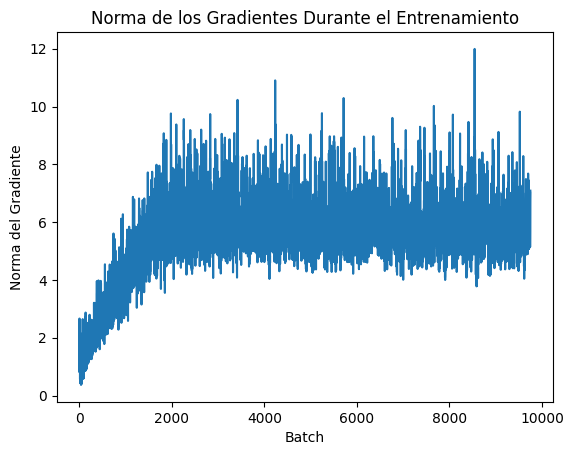

Pérdida Promedio en Validación: 0.2852
Perplejidad: 1.3300
Exactitud (Accuracy): 94.11%

Texto Generado:
King
Those servant,
Tihmanth him to the harms in his isought, but on the prides,
So banty,
truroud if an ure
Tting hand and men deter trinker kneast to kten:
SarlA been run;
Got things I bightd; we in the


In [ ]:
# Parámetros de entrada
sequence_length = 200
num_layers = 4
vocab_size = len(chars)
batch_size = 256

# Crear el dataloader
dataset = TextDataset(encoded_text, sequence_length)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Paso 6: Configuración y Entrenamiento
embedding_dim = 64
hidden_dim = 128
output_dim = vocab_size
learning_rate = 0.003
epochs = 25
dropout = 0.5 # Dropout
weight_decay = 1e-4  # Regularización L2

model = CompleteRNN(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, dropout=dropout).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay)

train(model, dataloader, criterion, optimizer, epochs)

# Paso 6: Evaluación del Modelo
avg_loss, perplexity, accuracy = evaluate_model(model, dataloader, criterion)
print(f'Pérdida Promedio en Validación: {avg_loss:.4f}')
print(f'Perplejidad: {perplexity:.4f}')
print(f'Exactitud (Accuracy): {accuracy * 100:.2f}%')

# Generación de texto
start_str = "King"
generated_text = generate_text(model, start_str, length=200)

# Añadiendo Word Vector Quantization

La cuantización vectorial (Vector Quantization, VQ) es una técnica empleada en aprendizaje automático para comprimir datos y optimizar la búsqueda de similitudes. Consiste en transformar datos de alta dimensionalidad en representaciones más compactas, lo que disminuye considerablemente la carga computacional y acelera el procesamiento. Esta técnica se implementa en diversas formas, como la cuantización ternaria, la cuantización de bits bajos y la cuantización binaria, cada una con características, beneficios y retos específicos.

El propósito principal de VQ es reducir el error de cuantificación, que representa la diferencia entre los datos originales y su versión comprimida. Al minimizar este error, VQ logra una compresión eficiente y facilita la búsqueda de similitudes, preservando la calidad de la información original.

#### **Procedimiento**

1. La cuantización de un vector comienza definiendo un conjunto de entrada
2. Posteriormentese se definen los vectores representativos, conocidos como vectores del diccionario o palabras de código.
3. Luego, para cada vector de entrada, se identifica la palabra de código más cercana dentro del diccionario (normalmente se utiliza el centroide y la distancia euclideana) y el vector de entrada es reemplazado por el índice correspondiente a esa palabra de código.
4. Actualizar los vectores del diccionario como el promedio de los vectores asignados a su región correspondiente:
5. Repetir hasta la convergencia los pasos 4 y 5 hasta que el diccionario deje de cambiar, lo que permite comprimir los datos al representarlos mediante un conjunto reducido de vectores.

#### **Uso de K-means*

La cuantización vectorial y el algoritmo k-means son técnicas estrechamente relacionadas en el aprendizaje automático. Mientras que VQ es un método para comprimir datos y facilitar la búsqueda eficiente de similitudes, k-means es un algoritmo de agrupamiento que a menudo se utiliza para generar los vectores representativos, conocidos como palabras de código, en el proceso de cuantización vectorial. En este contexto, k-means divide los datos de entrada en K clústeres, y los centroides de estos clústeres se convierten en las palabras de código.

**Pasos**

1. **Preparación de los datos:** Reúne el conjunto de datos multidimensional que deseas cuantizar. Estos datos pueden provenir de imágenes, señales de audio u otros tipos de datos en forma de vectores.

2. **Definir el tamaño del diccionario:** Decide el número de clústeres K, que representará el número de palabras de código en el diccionario. Este valor determina el nivel de compresión y debe ser seleccionado según las necesidades del problema.

3. **Inicialización de los centroides:** Inicializa los centroides de los clústeres, que pueden ser seleccionados aleatoriamente o usando métodos más sofisticados como k-means++ para mejorar la convergencia.

4. **Asignación de vectores a los clústeres:** Cada vector de entrada se asigna al clúster cuyo centroide esté más cercano, según una métrica de distancia (generalmente la distancia euclidiana). Este paso divide el espacio de datos en regiones conocidas como regiones de Voronoi.

5. **Recalcular los centroides:** Una vez que los vectores se han asignado a los clústeres, los centroides se actualizan calculando el promedio de los vectores asignados a cada clúster. Este paso ajusta las palabras de código para representar mejor los datos.

6. **Iterar hasta la convergencia:** Repite los pasos de asignación y actualización hasta que los centroides cambien muy poco entre iteraciones o se alcance un número máximo de iteraciones.

7. **Reemplazar vectores por índices: ** Una vez que los centroides han convergido, cada vector de entrada es reemplazado por el índice del clúster al que pertenece. Esto reduce significativamente el tamaño de los datos, ya que los vectores originales ahora están representados por los índices de sus palabras de código correspondientes.

In [67]:
from sklearn.cluster import KMeans
import numpy as np

# Paso 2: Modelo Adaptado con Embeddings Cuantizados
class CompleteRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_capas, quantized_embeddings, dropout=0.5):
        super(CompleteRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_capas

        # Usar los embeddings cuantizados
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight = nn.Parameter(torch.tensor(quantized_embeddings, dtype=torch.float32))
        self.embedding.weight.requires_grad = False

        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=num_capas, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.rnn(x, hidden)
        out = self.dropout(out)
        out = self.fc(out.reshape(-1, self.hidden_dim))
        return out, hidden

    def init_hidden(self, batch_size):
        return torch.zeros(self.num_layers, batch_size, self.hidden_dim).to(device)

# Paso 3: Función de Entrenamiento
def train(model, dataloader, criterion, optimizer, epochs):
    model.train()
    grad_norms = []  # Guardar la norma de los gradientes en cada lote

    for epoch in range(epochs):
        total_loss = 0
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            hidden = model.init_hidden(inputs.size(0)).detach()
            optimizer.zero_grad()
            outputs, hidden = model(inputs, hidden)
            loss = criterion(outputs, targets.view(-1))
            loss.backward()

            # Calcular la norma del gradiente
            grad_norm = 0
            for p in model.rnn.parameters():
                if p.grad is not None:
                    grad_norm += p.grad.norm().item()
            grad_norms.append(grad_norm)

            optimizer.step()
            total_loss += loss.item()

        print(f'Época [{epoch+1}/{epochs}], Pérdida: {total_loss/len(dataloader):.4f}')

    # Graficar la norma del gradiente
    plt.plot(grad_norms)
    plt.xlabel('Lote')
    plt.ylabel('Norma del Gradiente')
    plt.title('Norma de los Gradientes Durante el Entrenamiento')
    plt.show()


Época [1/25], Pérdida: 2.7148
Época [2/25], Pérdida: 2.1004
Época [3/25], Pérdida: 1.7647
Época [4/25], Pérdida: 1.5342
Época [5/25], Pérdida: 1.3582
Época [6/25], Pérdida: 1.2256
Época [7/25], Pérdida: 1.1292
Época [8/25], Pérdida: 1.0563
Época [9/25], Pérdida: 1.0063
Época [10/25], Pérdida: 0.9653
Época [11/25], Pérdida: 0.9312
Época [12/25], Pérdida: 0.9070
Época [13/25], Pérdida: 0.8860
Época [14/25], Pérdida: 0.8733
Época [15/25], Pérdida: 0.8568
Época [16/25], Pérdida: 0.8491
Época [17/25], Pérdida: 0.8368
Época [18/25], Pérdida: 0.8292
Época [19/25], Pérdida: 0.8250
Época [20/25], Pérdida: 0.8187
Época [21/25], Pérdida: 0.8130
Época [22/25], Pérdida: 0.8085
Época [23/25], Pérdida: 0.8024
Época [24/25], Pérdida: 0.7990
Época [25/25], Pérdida: 0.7967


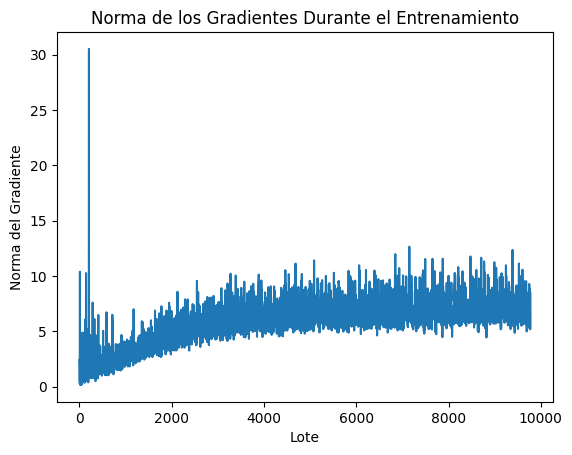

Pérdida Promedio en Validación: 0.6330
Perplejidad: 1.8833
Exactitud (Accuracy): 82.31%

Texto Generado:
King unster, sir Were she then cold. Aysele your strength
Should to.

TUCI CeutCt:
I'll do lirturn,
That rion, and they all ny canseceronch you mo-boctive. Shaqul ne; them to forn Shallend Prom,
And her s


In [73]:
# Paso 5: Configuración del Modelo y Entrenamiento
# Parámetros del modelo
sequence_length = 200
batch_size = 128
embedding_dim = 64
hidden_dim = 128
output_dim = vocab_size
num_layers = 4
dropout = 0.5
learning_rate = 0.005
epochs = 25
weight_decay = 1e-4  # Regularización L2

pretrained_embeddings = np.random.rand(vocab_size, embedding_dim)  # embeddings preentrenados

# Aplicar K-means para cuantizar los embeddings
num_clusters = min(50, len(chars))  # Número de clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(pretrained_embeddings)
centroids = kmeans.cluster_centers_
word_to_cluster = {i: kmeans.labels_[i] for i in range(vocab_size)}

# Crear un nuevo embedding basado en los centroides
quantized_embeddings = np.array([centroids[word_to_cluster[i]] for i in range(vocab_size)])

# Inicializar modelo, criterio y optimizador
model = CompleteRNN(vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, quantized_embeddings, dropout).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

# Entrenar el modelo y visualizar la norma de los gradientes
train(model, dataloader, criterion, optimizer, epochs)

# Paso 6: Evaluación del Modelo
avg_loss, perplexity, accuracy = evaluate_model(model, dataloader, criterion)
print(f'Pérdida Promedio en Validación: {avg_loss:.4f}')
print(f'Perplejidad: {perplexity:.4f}')
print(f'Exactitud (Accuracy): {accuracy * 100:.2f}%')

# Generación de texto
start_str = "King"
generated_text = generate_text(model, start_str, length=200)